In [1]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.gofplots import qqplot
from statsmodels.tsa.stattools import adfuller
from tqdm import tqdm_notebook
from itertools import product
from typing import Union

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df = pd.read_csv('../data/Bitcoin_sort.csv')
df.head()

,id,CoinDate,CoinOpen,CoinHigh,CoinLow,CoinClose,CoinVolume,CoinCap
0,937,2020/05/04,8895.74,8956.91,8645.02,8912.65,4.571880e+10,1.636545e+11
1,936,2020/05/05,8912.83,9062.41,8856.83,9003.07,4.314846e+10,1.653325e+11
2,935,2020/05/06,9007.44,9411.47,8966.71,9268.76,4.937189e+10,1.702296e+11
3,934,2020/05/07,9261.90,9992.66,9138.32,9951.52,6.111270e+10,1.827874e+11
4,933,2020/05/08,9936.16,9996.74,9767.17,9842.67,5.178075e+10,1.808049e+11


In [3]:
x_date=[]
for i in range(0,938,91):
    x_date.append(df['CoinDate'][i])

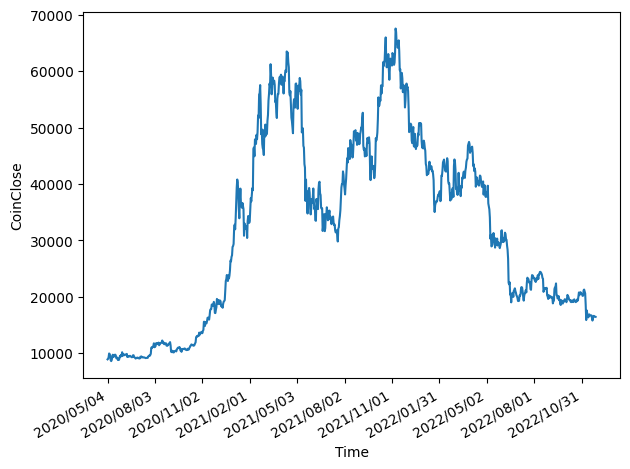

In [4]:
fig, ax = plt.subplots()

ax.plot(df['CoinClose'])
ax.set_xlabel('Time')
ax.set_ylabel('CoinClose')

plt.xticks(np.arange(0,938,91),x_date)

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/peixeiro.png', dpi=300)

In [5]:
ad_fuller_result = adfuller(df['CoinClose'])

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -1.486996879940301
p-value: 0.5399337098655169


In [6]:
eps_diff = np.diff(df['CoinClose'], n=1)

ad_fuller_result = adfuller(eps_diff)

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -31.50427486277576
p-value: 0.0
